In [5]:
import os
import tifffile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from natsort import natsorted

In [6]:
# Set the path to the directory containing the image stacks
stack_dir = 'E:/Temperature_images/RAW_2023-07-13/Stacks/'

# Get a list of all TIFF files in the input directory
files = [f for f in os.listdir(stack_dir) if f.endswith('.tiff')]
print(files)

green_stack = tifffile.imread(os.path.join(stack_dir, files[1]))
red_stack = tifffile.imread(os.path.join(stack_dir, files[2]))
blue_stack = tifffile.imread(os.path.join(stack_dir, files[0]))

#Get length of image stacks
num_images_green = len(green_stack)
num_images_red = len(red_stack)
num_images_blue =len(blue_stack)
if num_images_green == num_images_red and num_images_blue:
    print("Equal stacks")
    num_images = num_images_green
else:
    print("unequal stacks")

print("stack=",num_images)

['stacked_blue_channel.tiff', 'stacked_green_channel.tiff', 'stacked_red_channel.tiff']
Equal stacks
stack= 64


In [7]:
#FOR TEMPERATURE CALIBRATION: Loop through all red/blue pairs of images in the stacks an get the RED/BLUE intensity ratio
mean_red_intensity =[]
mean_green_intensity = []
mean_blue_intensity = []
std_red_intensity = []
std_green_intensity = []
std_blue_intensity =[]
red_blue_ratio = []
mean_red_blue_ratio =[]
red_blue_std = []

for i in range(num_images):

    mean_red_intensity.append(np.mean(red_stack[i]))
    mean_green_intensity.append(np.mean(green_stack[i]))
    mean_blue_intensity.append(np.mean(blue_stack[i]))
    std_red_intensity.append(np.std(red_stack[i]))
    std_green_intensity.append(np.std(green_stack[i]))
    std_blue_intensity.append(np.std(blue_stack[i]))

    # Calculate the intensity ratio between the two images
    ratio = red_stack[i] / blue_stack[i]
    mean_red_blue_ratio.append(np.mean(ratio))
    red_blue_ratio.append(ratio)
    red_blue_std.append(np.std(ratio))


In [8]:
# Define number of sections for each image to calculate mean ratios
num_sections = 3

# Calculate the height of each section
section_height = red_stack.shape[1] // num_sections

# Loop over eack image in the ratio stack and divide it into sections
ratio_section_means = []
ratio_sections = []

# CHANGE DEPENDING ON CALIBRATION
for image in red_blue_ratio:
    sections = [image[i*section_height:(i+1)*section_height, :] for i in range(num_sections)]
    ratio_sections.append(sections)

    # Calculate the mean ratio of eacjh section and append it to the list
    ratio_section_mean = [np.nanmean(section) for section in sections]
    ratio_section_means.append(ratio_section_mean)

# Reshape array of mean ratios to 
ratio_section_means = np.reshape(ratio_section_means, (-1, num_sections))
print(ratio_section_means)

[[4.14287836 4.22390049 4.27986929]
 [4.08956348 4.17326475 4.24710604]
 [4.00127046 4.0630175  4.09887069]
 [3.9985475  4.05637179 4.09111967]
 [4.02424844 4.09285576 4.13964656]
 [4.01119313 4.0768338  4.12103779]
 [4.00206393 4.06576713 4.10193246]
 [4.00091537 4.06424856 4.09822056]
 [3.99460127 4.05232791 4.0870133 ]
 [3.98693345 4.04491629 4.07901729]
 [3.97485879 4.03599457 4.07225455]
 [3.95101261 4.00926076 4.04611985]
 [3.92817086 3.986376   4.02200107]
 [3.90231899 3.96044025 3.99415371]
 [3.87885128 3.93595074 3.96840017]
 [3.85089735 3.90815014 3.94213465]
 [3.82914767 3.88386172 3.9185334 ]
 [3.80409326 3.85921439 3.89279999]
 [3.77927636 3.83428375 3.8667537 ]
 [3.75620421 3.81121069 3.84476965]
 [3.73140307 3.7852189  3.81879411]
 [3.70994043 3.76393923 3.79729249]
 [3.68461421 3.73949482 3.77277773]
 [3.66355319 3.71787129 3.7521175 ]
 [3.63966965 3.69431137 3.7291385 ]
 [3.61830504 3.67327932 3.70802265]
 [3.59834389 3.65217962 3.6876955 ]
 [3.5779703  3.63187858 3.66

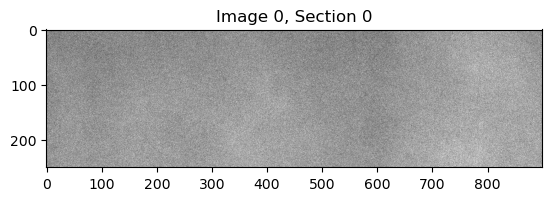

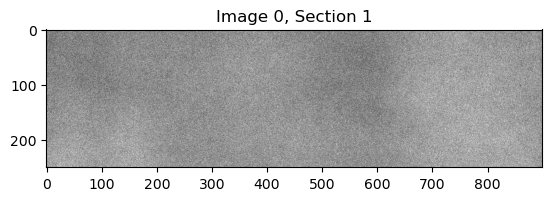

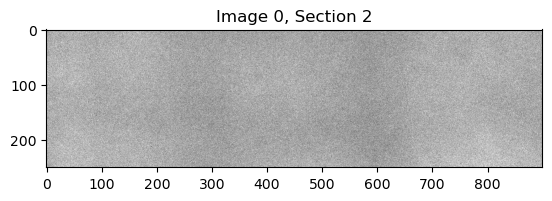

In [9]:
# Define the image index to show
image_idx = 0

# Get an example image from the green stack and its sections to see how its divided
image = red_stack[image_idx]
sections = ratio_sections[image_idx]

for section_idx in range(num_sections):
    section = sections[section_idx]
    plt.imshow(section, cmap="gray")
    plt.title(f'Image {image_idx}, Section {section_idx}')
    plt.show()


In [10]:
# Calculate the mean of means for each image and the standard deviation
ratio_mean_of_means = []
ratio_std_of_means =[]

for i in range(len(ratio_section_means)):
    mean_ratio = np.nanmean(ratio_section_means[i])
    std_ratio = np.nanstd(ratio_section_means[i])
    ratio_mean_of_means.append(mean_ratio)
    ratio_std_of_means.append(std_ratio)

print(ratio_mean_of_means)
print(ratio_std_of_means)

[4.215549380404582, 4.169978089635894, 4.054386215596948, 4.048679656562124, 4.085583588469404, 4.069688237856688, 4.056587837997043, 4.054461496885971, 4.0446474922813165, 4.036955673781004, 4.027702636747769, 4.0021310745498555, 3.978849310862657, 3.9523043174935317, 3.9277340637652323, 3.9003940455126753, 3.8771809318674375, 3.8520358788501334, 3.8267712725773912, 3.804061516191909, 3.7784720249661845, 3.7570573843583173, 3.73229558779478, 3.7111806616652525, 3.6877065081256717, 3.6665356719626625, 3.646073000733787, 3.625463586646342, 3.608661253535072, 3.590652468647336, 3.5788606887506824, 3.565059909836171, 3.5498800949486076, 3.5332580880263684, 3.5199177456514295, 3.507824571632293, 3.495731840899252, 3.486003468992282, 3.4741317252840553, 3.465779423685752, 3.4547824623972176, 3.4471953271779463, 3.4379716482931273, 3.430226557994409, 3.422086915674584, 3.4132291625344995, 3.4069929250902944, 3.398800445060838, 3.3935111059474123, 3.386403510111977, 3.379812045508976, 3.37307

In [11]:
# Set the path to the directory containing the image filenames
files_dir = 'E:/Temperature_images/RAW_2023-07-13/'
files = [f for f in os.listdir(files_dir) if f.endswith('.tiff')]

# Sort filenames to match with stack index
files = natsorted(files)

# Initialize an empty dataframe
df_ratios = pd.DataFrame(columns=['Temperature/O2', 'Intensity Ratio', 'Intensity Red', 'Intensity Green', 'Intensity Blue', 'Std Ratio','Std Red','Std Green', 'Std Blue'])

# Add filenames and corresponding red/green ratio to the dataframe
for i in range(num_images):
    ratio_df = ratio_mean_of_means[i]
    std_df = ratio_std_of_means[i]
    blue_intensity = mean_blue_intensity[i]
    green_intensity = mean_green_intensity[i]
    red_intensity = mean_red_intensity[i]
    blue_std = std_blue_intensity[i]
    green_std = std_green_intensity[i]
    red_std = std_red_intensity[i]
    filename = os.path.splitext(files[i])[0][15:]
    numeric_num = float(filename.replace(",", ".")) 
    df_ratios.loc[i] = [numeric_num, ratio_df, red_intensity, green_intensity, blue_intensity, std_df, red_std, green_std, blue_std]

#df_ratios['Intensity Ratio'] = df_ratios['Intensity Ratio'].round(4)

# Print the dataframe
print(df_ratios)

    Temperature/O2  Intensity Ratio  Intensity Red  Intensity Green  \
0            3.660         4.215549    2168.804856      2588.983462   
1            4.660         4.169978    2134.810333      2560.863967   
2            5.340         4.054386    2044.006936      2482.665424   
3            5.560         4.048680    2039.271233      2478.650600   
4            5.730         4.085584    2068.414504      2503.301185   
..             ...              ...            ...              ...   
59          19.250         3.340528    1520.088041      1994.750821   
60          19.370         3.334157    1515.939993      1990.932984   
61          19.621         3.307529    1498.364142      1974.800895   
62          19.751         3.300230    1493.724865      1970.504121   
63          19.861         3.292849    1488.754455      1965.691341   

    Intensity Blue  Std Ratio     Std Red   Std Green   Std Blue  
0       514.588858   0.056237  100.626704  101.497338  20.313240  
1       511.9

In [12]:
#Save the DataFrame as a CSV file
df_ratios.to_csv('E:/Temperature_images/RAW_2023-07-13/red_blue_ratio.csv',header=True, index=False)

In [13]:
df_ratios = pd.read_csv('E:/Temperature_images/RAW_2023-07-13/red_blue_ratio.csv')
print(df_ratios)

    Temperature/O2  Intensity Ratio  Intensity Red  Intensity Green  \
0            3.660         4.215549    2168.804856      2588.983462   
1            4.660         4.169978    2134.810333      2560.863967   
2            5.340         4.054386    2044.006936      2482.665424   
3            5.560         4.048680    2039.271233      2478.650600   
4            5.730         4.085584    2068.414504      2503.301185   
..             ...              ...            ...              ...   
59          19.250         3.340528    1520.088041      1994.750821   
60          19.370         3.334157    1515.939993      1990.932984   
61          19.621         3.307529    1498.364142      1974.800895   
62          19.751         3.300230    1493.724865      1970.504121   
63          19.861         3.292849    1488.754455      1965.691341   

    Intensity Blue  Std Ratio     Std Red   Std Green   Std Blue  
0       514.588858   0.056237  100.626704  101.497338  20.313240  
1       511.9

c:\Users\au519867\AppData\Local\anaconda3\Lib\site-packages\matplotlib\lines.py:1204: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  neq = current != val


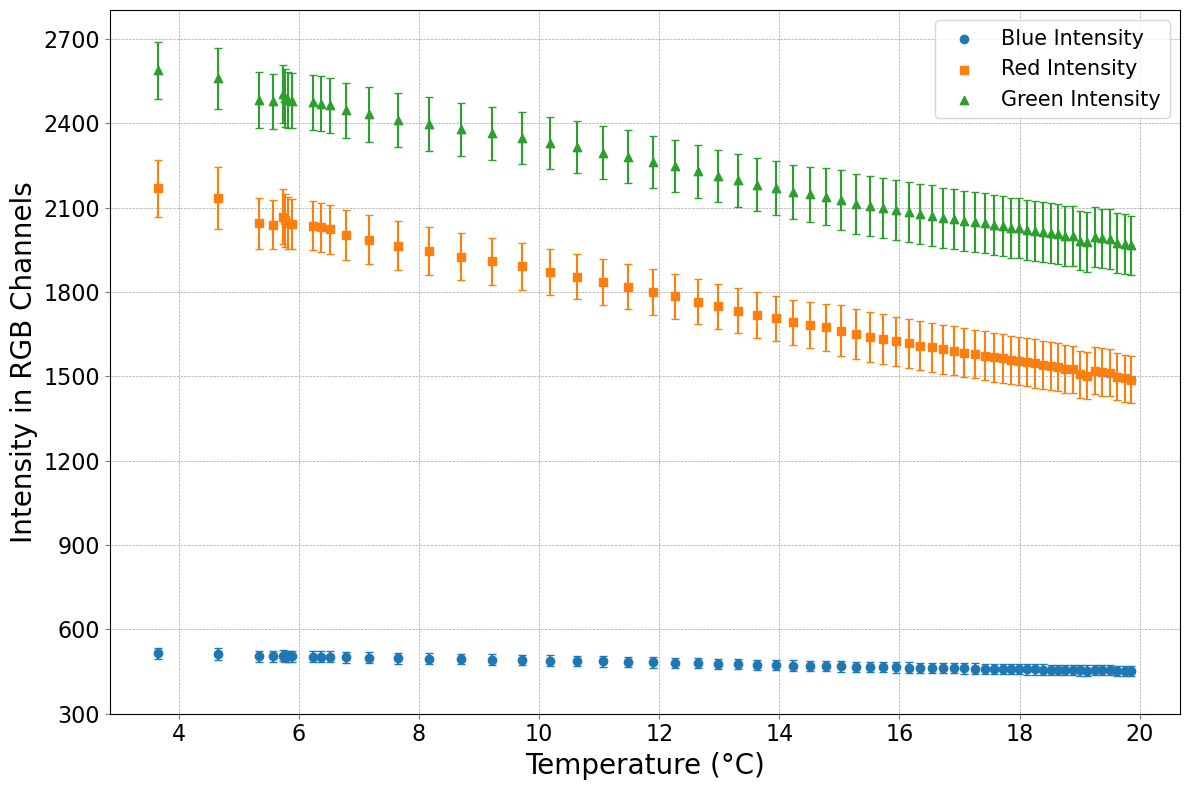

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_ratios is your DataFrame and it's already defined

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(12, 8))

# Define colors from the tab10 color palette
colors = plt.cm.tab10(np.linspace(0, 1, 10))

# Blue Intensity
ax1.scatter(df_ratios['Temperature/O2'], df_ratios['Intensity Blue'], color=colors[0], label='Blue Intensity', alpha=1)
ax1.errorbar(df_ratios['Temperature/O2'], df_ratios['Intensity Blue'], yerr=df_ratios['Std Blue'], color=colors[0], fmt='none', capsize=3)
#ax1.plot(df_ratios['Temperature/O2'], np.polyval(np.polyfit(df_ratios['Temperature/O2'], df_ratios['Intensity Blue'], 1), df_ratios['Temperature/O2']), color='black')

# Red Intensity
ax1.scatter(df_ratios['Temperature/O2'], df_ratios['Intensity Red'], color=colors[1], label='Red Intensity', alpha=1, marker="s")
ax1.errorbar(df_ratios['Temperature/O2'], df_ratios['Intensity Red'], yerr=df_ratios['Std Red'], color=colors[1], fmt='none', capsize=3)
#ax1.plot(df_ratios['Temperature/O2'], np.polyval(np.polyfit(df_ratios['Temperature/O2'], df_ratios['Intensity Red'], 1), df_ratios['Temperature/O2']), color='black')

# GreenIntensity
ax1.scatter(df_ratios['Temperature/O2'], df_ratios['Intensity Green'], color=colors[2], label='Green Intensity', alpha=1, marker="^")
ax1.errorbar(df_ratios['Temperature/O2'], df_ratios['Intensity Green'], yerr=df_ratios['Std Green'], color=colors[2], fmt='none', capsize=3)
#ax1.plot(df_ratios['Temperature/O2'], np.polyval(np.polyfit(df_ratios['Temperature/O2'], df_ratios['Intensity Green'], 1), df_ratios['Temperature/O2']), color='black')

# Customize ax1 (primary axis)
ax1.set_xlabel('Temperature (°C)', fontsize=20, color='black')
ax1.set_ylabel('Intensity in RGB Channels', fontsize=20)
ax1.tick_params(axis='both', labelsize=16,  color=colors[4])
ax1.set_yticks(np.arange(300, 2800, 300))
ax1.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)


# Combine the legends for both axes
lines, labels = ax1.get_legend_handles_labels()

ax1.legend(lines, labels, loc='upper right', fontsize=15)

# Adjust spacing and show plot
fig.tight_layout()
plt.savefig('E:/Temperature_images/RAW_2023-07-13/temp_RGB_output.png', dpi=300)
plt.show()


In [15]:
import os
import pandas as pd
from natsort import natsorted
from sklearn.linear_model import LinearRegression
import numpy as np

# Set the path to the directory containing the image filenames
files_dir = 'E:/Temperature_images/RAW_2023-07-13/'
files = [f for f in os.listdir(files_dir) if f.endswith('.tiff')]

# Sort filenames to match with stack index
files = natsorted(files)

# Initialize an empty dataframe
df_ratios_adj = pd.DataFrame(columns=['Temperature/O2', 'Intensity Ratio', 'Intensity Red', 'Intensity Green', 'Intensity Blue', 'Adjusted Blue', 'Std Ratio', 'Std Red', 'Std Green', 'Std Blue'])

# Assuming the necessary intensity and standard deviation lists are already defined

# Perform linear regression to adjust the blue channel based on the green channel
X_green = np.array(mean_green_intensity).reshape(-1, 1)  # Green intensities as independent variable
y_blue = mean_blue_intensity  # Blue intensities as dependent variable

linear_regressor_green = LinearRegression()
linear_regressor_green.fit(X_green, y_blue)

# Coefficients for the linear regression
coefficients_green = linear_regressor_green.coef_[0]
intercept_green = linear_regressor_green.intercept_

print("Linear Regression Coefficients:")
print("Slope (coefficients_green):", coefficients_green)
print("Intercept (intercept_green):", intercept_green)

# Add filenames and corresponding red/green ratio to the dataframe
for i in range(num_images):
    blue_intensity = mean_blue_intensity[i]
    green_intensity = mean_green_intensity[i]

    # Print current blue and green intensities
    print(f"\nImage {i + 1}:")
    print("Blue Intensity:", blue_intensity)
    print("Green Intensity:", green_intensity)

    # Calculate the adjusted blue intensity
    adjusted_blue = blue_intensity - (coefficients_green * green_intensity) #+ intercept_green
    print("Adjusted Blue Intensity:", adjusted_blue)

    # Remaining calculations
    red_intensity = mean_red_intensity[i]
    ratio_df = (red_intensity / adjusted_blue)
    std_df = ratio_std_of_means[i]
    blue_std = std_blue_intensity[i]
    green_std = std_green_intensity[i]
    red_std = std_red_intensity[i]
    filename = os.path.splitext(files[i])[0][15:]
    numeric_num = float(filename.replace(",", "."))
    
    df_ratios_adj.loc[i] = [numeric_num, ratio_df, red_intensity, green_intensity, blue_intensity, adjusted_blue, std_df, red_std, green_std, blue_std]

# Print the final dataframe
print("\nFinal DataFrame:")
print(df_ratios_adj)



Linear Regression Coefficients:
Slope (coefficients_green): 0.10099727205732023
Intercept (intercept_green): 253.61440882189763

Image 1:
Blue Intensity: 514.5888577777778
Green Intensity: 2588.9834622222224
Adjusted Blue Intensity: 253.10859069181714

Image 2:
Blue Intensity: 511.9829022222222
Green Intensity: 2560.8639674074075
Adjusted Blue Intensity: 253.34262740418785

Image 3:
Blue Intensity: 504.2733777777778
Green Intensity: 2482.6654237037037
Adjusted Blue Intensity: 253.53094255267263

Image 4:
Blue Intensity: 503.82861037037037
Green Intensity: 2478.6506
Adjusted Blue Intensity: 253.49166138713036

Image 5:
Blue Intensity: 506.362802962963
Green Intensity: 2503.301185185185
Adjusted Blue Intensity: 253.53621212140266

Image 6:
Blue Intensity: 505.09541925925924
Green Intensity: 2490.9549451851854
Adjusted Blue Intensity: 253.51576497786388

Image 7:
Blue Intensity: 504.3666074074074
Green Intensity: 2483.616631111111
Adjusted Blue Intensity: 253.52810282899338

Image 8:
Blue

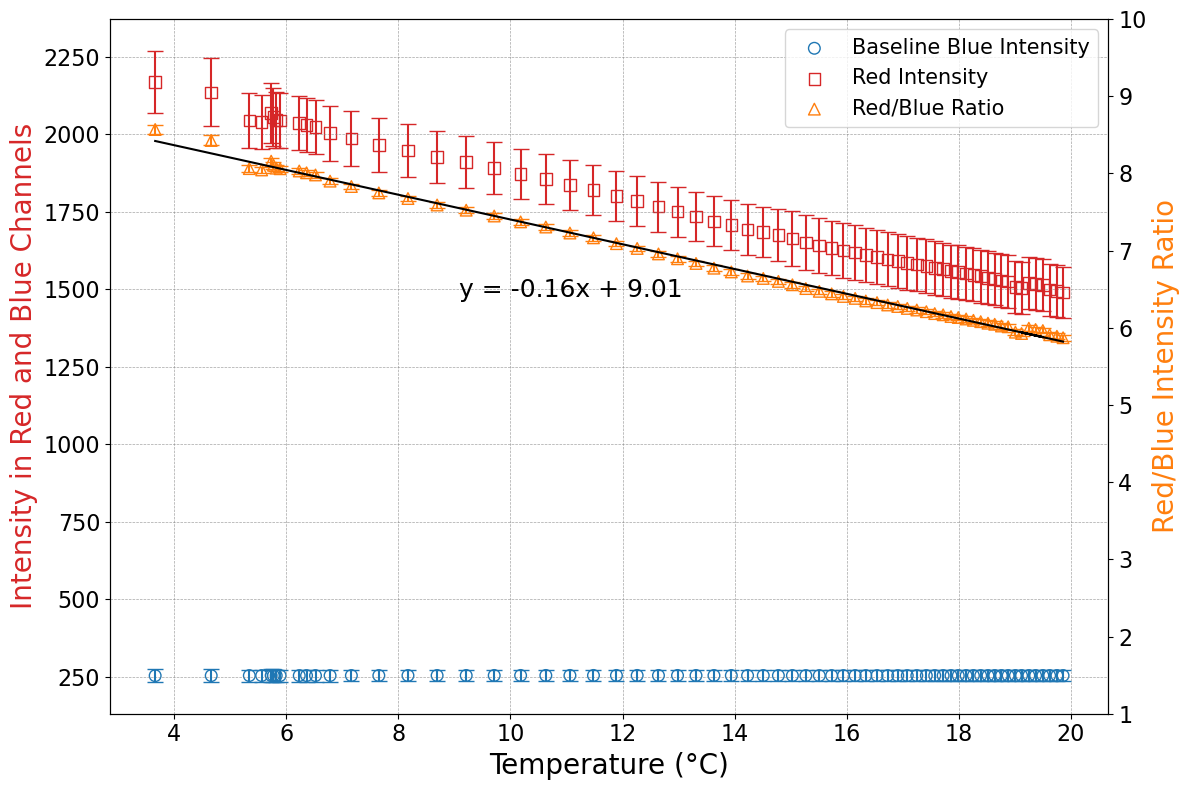

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_ratios_adj is your DataFrame and it's already defined

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(12, 8))

# Define colors from the tab10 color palette
colors = plt.cm.tab10(np.linspace(0, 1, 10))

# Calculate linear regression coefficients
coef_blue = np.polyfit(df_ratios_adj['Temperature/O2'], df_ratios_adj['Adjusted Blue'], 1)
coef_red = np.polyfit(df_ratios_adj['Temperature/O2'], df_ratios_adj['Intensity Red'], 1)
coef_ratio = np.polyfit(df_ratios_adj['Temperature/O2'], df_ratios_adj['Intensity Ratio'], 1)

# Create linear regression lines
line_blue = np.polyval(coef_blue, df_ratios_adj['Temperature/O2'])
line_red = np.polyval(coef_red, df_ratios_adj['Temperature/O2'])
line_ratio = np.polyval(coef_ratio, df_ratios_adj['Temperature/O2'])

# Linear regression equations as strings
#eq_blue = f'y = {coef_blue[0]:.2f}x + {coef_blue[1]:.2f}'
#eq_red = f'y = {coef_red[0]:.2f}x + {coef_red[1]:.2f}'
eq_ratio = f'y = {coef_ratio[0]:.2f}x + {coef_ratio[1]:.2f}'

# Plotting data and regression lines


ax1.scatter(df_ratios_adj['Temperature/O2'], df_ratios_adj['Adjusted Blue'], color=colors[0], label='Baseline Blue Intensity', alpha=1, facecolors="none",s=70)
ax1.errorbar(df_ratios_adj['Temperature/O2'], df_ratios_adj['Adjusted Blue'], yerr=df_ratios_adj['Std Blue'], color=colors[0], fmt='none', capsize=6)
#ax1.plot(df_ratios_adj['Temperature/O2'], line_blue, color='black')
#ax1.annotate(eq_blue, xy=(0.55, 0.95), xycoords='axes fraction', color=colors[0], fontsize=12)

ax1.scatter(df_ratios_adj['Temperature/O2'], df_ratios_adj['Intensity Red'], color=colors[3], label='Red Intensity', alpha=1, marker="s",facecolors="none", s=70)
ax1.errorbar(df_ratios_adj['Temperature/O2'], df_ratios_adj['Intensity Red'], yerr=df_ratios_adj['Std Red'], color=colors[3], fmt='none', capsize=6)
#ax1.plot(df_ratios_adj['Temperature/O2'], line_red, color='black')
#ax1.annotate(eq_red, xy=(0.55, 0.90), xycoords='axes fraction', color=colors[3], fontsize=12)
ax1.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)

# Secondary axis for intensity ratio
ax2 = ax1.twinx()
ax2.scatter(df_ratios_adj['Temperature/O2'], df_ratios_adj['Intensity Ratio'], color=colors[1], label='Red/Blue Ratio', alpha=1, marker="^", facecolors="none",s=70)
ax2.errorbar(df_ratios_adj['Temperature/O2'], df_ratios_adj['Intensity Ratio'], yerr=df_ratios_adj['Std Ratio'], color=colors[1], fmt='none', capsize=6)
ax2.plot(df_ratios_adj['Temperature/O2'], line_ratio, color='black')
ax2.annotate(eq_ratio, xy=(0.35, 0.60), xycoords='axes fraction', color="black", fontsize=18)

ax1.set_ylabel('Intensity in Red and Blue Channels', fontsize=20, color=colors[3])
ax1.tick_params(axis='y', labelsize=16, colors="black")
ax1.set_xlabel('Temperature (°C)', fontsize=20, color='black')
ax1.tick_params(axis='x', labelsize=16, colors="black")
# Customize ax2 (secondary axis)
ax2.set_ylabel('Red/Blue Intensity Ratio', fontsize=20, color=colors[1])
ax2.tick_params(axis='y', labelsize=16, colors="black")
ax2.set_yticks(np.arange(1, 11, 1))

# Combine the legends for both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right', fontsize=15)

# Adjust spacing and show plot
fig.tight_layout()
plt.savefig('E:/Temperature_images/RAW_2023-07-13/Temperature_cali.png', dpi=300)
plt.show()


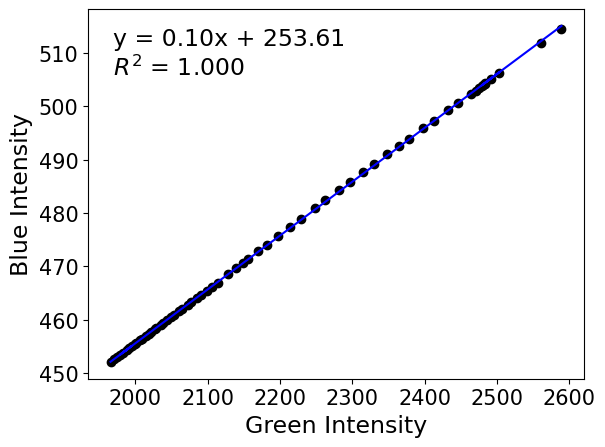

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_blue_vs_green(file_path, label_fontsize=12, tick_fontsize=10):
    # Load the data
    data = pd.read_csv(file_path)

    # Extract the relevant columns
    blue_intensity = data['Intensity Blue']
    green_intensity = data['Intensity Green']

    # Perform linear regression
    coef = np.polyfit(green_intensity, blue_intensity, 1)
    poly1d_fn = np.poly1d(coef) 

    # R-squared value
    correlation_matrix = np.corrcoef(green_intensity, blue_intensity)
    correlation_xy = correlation_matrix[0,1]
    r_squared = correlation_xy**2

    # Create the plot
    plt.scatter(green_intensity, blue_intensity, color='black')
    plt.plot(green_intensity, poly1d_fn(green_intensity), color="blue")  # regression line

    # Add regression line equation and R^2 to the plot
    plt.text(0.05, 0.95, f'y = {coef[0]:.2f}x + {coef[1]:.2f}\n$R^2$ = {r_squared:.3f}', 
             transform=plt.gca().transAxes, fontsize=label_fontsize, verticalalignment='top')

    # Set labels with adjustable font size
    plt.ylabel('Blue Intensity', fontsize=label_fontsize)
    plt.xlabel('Green Intensity', fontsize=label_fontsize)

    # Set tick parameters with adjustable font size
    plt.xticks(fontsize=tick_fontsize)
    plt.yticks(fontsize=tick_fontsize)
    
    plt.savefig('E:/Temperature_images/RAW_2023-07-13/blue_green_correlation.png', dpi=300 )
    #plt.grid(True)
    plt.show()

# Use the function with custom font sizes
file_path = 'E:/Temperature_images/RAW_2023-07-13/red_blue_ratio.csv'  
plot_blue_vs_green(file_path, label_fontsize=17, tick_fontsize=15)


NameError: name 'r_squared_with_intercept' is not defined

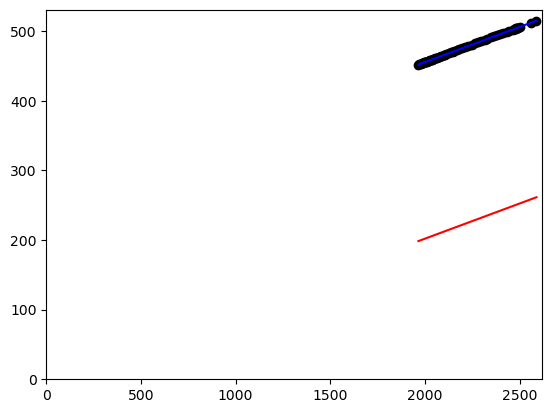

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_blue_vs_green(file_path, label_fontsize=12, tick_fontsize=10):
    # Load the data
    data = pd.read_csv(file_path)

    # Extract the relevant columns
    blue_intensity = data['Intensity Blue']
    green_intensity = data['Intensity Green']

    # Perform linear regression with intercept
    coef_with_intercept = np.polyfit(green_intensity, blue_intensity, 1)
    poly1d_fn_with_intercept = np.poly1d(coef_with_intercept) 

    # Perform linear regression without intercept (forcing through origin)
    coef_no_intercept = np.polyfit(green_intensity, blue_intensity, 1, full=False)
    poly1d_fn_no_intercept = np.poly1d([coef_no_intercept[0], 0]) 

    # Calculate the range for extrapolation
    green_min, green_max = min(green_intensity), max(green_intensity)
    green_range = np.linspace(green_min, green_max, 100)  # Create a range of values for plotting

    # Create the plot
    plt.scatter(green_intensity, blue_intensity, color='black')
    plt.plot(green_range, poly1d_fn_with_intercept(green_range), color="blue", label='With Intercept')  # regression line with intercept
    plt.plot(green_range, poly1d_fn_no_intercept(green_range), color="red", label='No Intercept')  # regression line without intercept

    # Extend the axes to zero to show extrapolation
    plt.xlim(left=0)
    plt.ylim(bottom=0)

    # Add regression line equation, R^2 for both models
    plt.text(0.05, 0.95, f'With Intercept: y = {coef_with_intercept[0]:.2f}x + {coef_with_intercept[1]:.2f}, $R^2$ = {r_squared_with_intercept:.3f}\n'
                         f'No Intercept: y = {coef_no_intercept[0]:.2f}x, $R^2$ = {r_squared_no_intercept:.3f}', 
             transform=plt.gca().transAxes, fontsize=label_fontsize, verticalalignment='top', color='blue')

    # Set labels with adjustable font size
    plt.xlabel('Green Intensity', fontsize=label_fontsize)
    plt.ylabel('Blue Intensity', fontsize=label_fontsize)
    plt.legend()

    # Set tick parameters with adjustable font size
    plt.xticks(fontsize=tick_fontsize)
    plt.yticks(fontsize=tick_fontsize)

    plt.grid(True)
    plt.show()

# Use the function with custom font sizes
file_path = 'E:/Temperature_images/RAW_2023-07-13/red_blue_ratio.csv'  # Update the file path
plot_blue_vs_green(file_path, label_fontsize=14, tick_fontsize=12)
